In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os
import pandas as pd
import numpy as np
import astropy.units as u
from datetime import date
from random import choices
from math import erf
import matplotlib.gridspec as gridspec
from scipy.ndimage import gaussian_filter1d
from sklearn.neighbors import KernelDensity
from scipy.integrate import simps
from matplotlib.ticker import AutoMinorLocator
from scipy.special import comb



In [46]:
def make_cmap(colors, position, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    bit_rgb = np.linspace(0,1,256)
    # if position == None:
    #     position = np.linspace(0,1,len(colors))
    # else:
    if len(position) != len(colors):
        sys.exit("position length must be the same as colors")
    elif position[0] != 0 or position[-1] != 1:
        sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap
def choose_cmap(custom_cmap, reverse_cmap=False):

    custom_cmaps = {'my diverging red blue': [(204/255, 230/255, 255/255),
                                              (0/255, 102/255, 204/255),
                                              (51/255, 0/255, 102/255),
                                              (255/255, 0/255, 102/255),
                                              (255/255, 230/255, 243/255)],
                    'my blue yellow red': [(0 / 255, 74 / 255, 171 / 255),
                                        (255 / 255, 209 / 255, 26 / 255),
                                        (178 / 255, 0 / 255, 3 / 255)],
                    'McLaren 2022': [(0/255, 38/255, 77/255),
                                    (211/255, 0/255, 87/255),
                                    (255/255, 153/255, 0/255),
                                    (191/255, 217/255, 217/255)],
                    'vibrant candy': [(0/255, 26/255, 77/255),
                                    (204/255, 0/255, 102/255),
                                    (255/255, 204/255, 0/255),
                                    (153/255, 255/255, 153/255)],
                    'ice queen': [(37/255, 0/255, 51/255),
                                  (0/255, 155/255, 153/255),
                                  (214/255, 255/255, 214/255)],
                    'ice queen2': [(0/255, 0/255, 0/255),
                                   (0/255, 134/255, 179/255),
                                   (255/255, 255/255, 200/255)],
                    'amazon queen': [(0/255, 0/255, 0/255),
                                     (25/255, 103/255, 103/255),
                                     (119/255, 179/255, 105/255),
                                     (255/255, 234/255, 0/255),
                                     (255/255, 255/255, 255/255)],
                    'amazon queen2': [(0/255, 34/255, 51/255),
                                      (25/255, 103/255, 103/255),
                                    #   (119/255, 179/255, 105/255),
                                    #   (63/255, 211/255, 146/255),
                                      (255/255, 234/255, 0/255)],
                    'colorado sunrise': [(0/255, 17/255, 51/255),
                                         (234/255, 74/255, 104/255),
                                         (255/255, 224/255, 102/255)],
                    'muted rbg': [(102/255, 0/255, 51/255),
                                  (0/255, 85/255, 128/255),
                                  (140/255, 153/255, 0/255)],
                    'perceptual rbg': [(102/255, 0/255, 51/255),
                                       (60/255, 40/255, 90/255),
                                       (0/255, 102/255, 153/255),
                                       (134/255, 179/255, 0/255),
                                       (255/255, 200/255, 50/255),
                                       (255/255, 255/255, 160/255)],
                    'mclaren livery': [(0/255, 119/255, 179/255),
                                       (204/255, 0/255, 102/255),
                                    #    (255/255, 128/255, 0/255),
                                       (255/255, 153/255, 0/255),
                                       (207/255, 226/255, 226/255)],
                    'volcanic sunrise': [(0/255, 51/255, 77/255),
                                  (153/255, 0/255, 77/255),
                                  (255/255, 80/255, 80/255),
                                  (255/255, 255/255, 153/255)],
                    'cyber grape': [(51/255, 0/255, 51/255),
                                    (128/255, 0/255, 128/255),
                                    (153/255, 102/255, 255/255),
                                    (204/255, 255/255, 255/255)],
                    'cyber grape2': [(51/255, 0/255, 51/255),
                                     (128/255, 0/255, 128/255),
                                     (255/255, 153/255, 204/255),
                                     (204/255, 255/255, 255/255)],
                    'black limeaid': [(0/255, 0/255, 77/255),
                                      (102/255, 153/255, 153/255),
                                      (204/255, 255/255, 51/255)],
                    }

    chosen_cmap = custom_cmaps[custom_cmap]
    pos_diff = 1./(len(chosen_cmap)-1)
    positions = np.arange(0, 1+pos_diff, pos_diff)
    if reverse_cmap == True:
        chosen_cmap = chosen_cmap[::-1]
    mycolormap = make_cmap(chosen_cmap, position=positions)

    return mycolormap

plt.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['mathtext.default'] = 'regular'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['mathtext.fontset'] = 'stixsans'
mpl.rcParams['mathtext.it'] = 'stixsans'
mpl.rcParams['mathtext.rm'] = 'stixsans'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['mathtext.bf'] = 'stixsans'
mpl.rcParams['xtick.major.size'] = 3.0
mpl.rcParams['xtick.minor.size'] = 1.70
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['ytick.major.size'] = 3.0
mpl.rcParams['ytick.minor.size'] = 1.70
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True


In [48]:
def unique(list_of_values):
    # Return a list of all unique values within input list
    unique_values = []
    for _, value in enumerate(list_of_values):
        if value in unique_values:
            pass
        else:
            unique_values.append(value)
    return unique_values

def weighted_mean(meas, meas_err):
    # Compute the weighted mean of a set of measurements with uncertainties
    try:
        weight = 1./(np.array(meas_err)**2)
    except:
        print('Error calculating weighted mean!')
        print(meas, ',', meas_err)
    else:
        w_mean = sum(weight * np.array(meas)) / sum(weight)
        w_mean_err = 1./np.sqrt(sum(weight))

    return w_mean, w_mean_err

def compute_adopted_parameter_value(targ_name, keyword, meas, meas_err, meas_ref):

    # possible_keywords = i disk (deg), vsini (km/s), Prot (d), Rstar (Rsun), Mstar (Msun)

    verbose = False # [DONT FORGET TO SET WHICH KEYWORD YOU WANT TO PRINT IF YOU SET VERBOSE = TRUE]
    if verbose == True:
        if keyword == 'Rstar (Rsun)':
            print('-------------------------------------------')
            print('\n' + targ_name)
            print(' ')
            print(keyword)
        else:
            verbose = False

    # ----------------------------------------------------------------------------------
    if (len(meas) > 0) and (verbose == True):
        print('INPUT SET OF MEASURED VALUES AND UNCERTAINTIES:')
        for bep_i in range(len(meas)):
            if meas_ref[bep_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                print(meas[bep_i], meas_err[bep_i], 'STASSUN')
            elif meas_ref[bep_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                print(meas[bep_i], meas_err[bep_i], 'YU')
            else:
                print(meas[bep_i], meas_err[bep_i])
        print(' ')
    # ----------------------------------------------------------------------------------

    
    meas1 = []
    meas_err1 = []
    meas_ref1 = []
    for meas_i in range(len(meas)):
        meas_val = meas[meas_i]
        err_val = meas_err[meas_i]
        ref_val = meas_ref[meas_i]
        if isinstance(meas_val, str) == True:
            if '>' in meas_val:
                meas_val = float('nan')
                err_val = float('nan')
            elif '<' in meas_val:
                if keyword == 'vsini (km/s)':
                    meas_val_split = meas_val.split('<')
                    meas_val = float(meas_val_split[-1])
                    err_val = 'ulimit'
                else:
                    meas_val = float('nan')
                    err_val = float('nan')
            elif '-' in meas_val:
                meas_val_split = meas_val.split('-')
                meas_val_limits = [float(parval) for parval in meas_val_split]
                meas_val = np.nanmean(meas_val_limits) 
                err_val = np.nanmean(meas_val_limits) - np.nanmin(meas_val_limits)
            else:
                meas_val = float(meas_val)

        elif np.isnan(meas_val) == True:
            continue
            # err_val = float('nan')
        
        if keyword == 'i disk (deg)':
            if type(meas_val) != str:
                if meas_val > 90:
                    meas_val = abs(meas_val - 180)
                if meas_val < 0:
                    meas_val = abs(meas_val)

        meas1.append(meas_val)
        meas_err1.append(err_val)
        meas_ref1.append(ref_val)


    if len(np.where(np.array(meas1) > 0)[0]) == 0:
        return [], []


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('MEASUREMENTS NOW CLEANED OF NON-NUMBER CHARACTERS AND CONVERTED TO FLOAT')
        if len(meas1) > 0:
            for bep1_i in range(len(meas1)):
                if meas_ref1[bep1_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                    print(meas1[bep1_i], meas_err1[bep1_i], 'STASSUN')
                elif meas_ref1[bep1_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                    print(meas1[bep1_i], meas_err1[bep1_i], 'YU')
                else:
                    print(meas1[bep1_i], meas_err1[bep1_i])
        print('  ')
    # ----------------------------------------------------------------------------------


    meas2 = []
    meas_err2 = []
    meas_ref2 = []
    for meas1_i in range(len(meas1)):
        meas1_val = meas1[meas1_i]
        err1_val = meas_err1[meas1_i]
        ref1_val = meas_ref1[meas1_i]
        if type(err1_val) == str:
            if err1_val == '-':
                err1_val = float('nan')

            elif ',' in err1_val:

                err1_val_split = err1_val.split(',')
                err1_val_limits = [float(parval) for parval in err1_val_split]

                if keyword == 'i disk (deg)':
                    
                    meas_range = [meas1[meas1_i] + err1_val_limits[0], meas1[meas1_i] - err1_val_limits[1]]
                    meas1_val = np.mean(meas_range)
                    err1_val = meas1_val - meas_range[1]

                    # print('\n')
                    # print(targ_name)
                    # print('meas_range: ', meas_range)
                    # print('meas1_val: ', meas1_val)
                    # print('err1_val: ', err1_val)
                    # print('\n')

                else:
                    err1_val = np.nanmean(err1_val_limits)
        
        meas2.append(meas1_val)
        meas_ref2.append(ref1_val)
        if err1_val != 'ulimit':
            meas_err2.append(float(err1_val))
        else:
            meas_err2.append(err1_val)


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('UNCERTAINTIES NOW CLEANED OF NON-NUMBER CHARACTERS AND CONVERTED TO FLOAT')
        if len(meas2) > 0:
            for bep2_i in range(len(meas2)):
                if meas_ref2[bep2_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                    print(meas2[bep2_i], meas_err2[bep2_i], 'STASSUN')
                elif meas_ref2[bep2_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                    print(meas2[bep2_i], meas_err2[bep2_i], 'YU')
                else:
                    print(meas2[bep2_i], meas_err2[bep2_i])
        print(' ')
    # ----------------------------------------------------------------------------------


    if keyword == 'Rstar (Rsun)':
        meas_temporary = []
        meas_err_temporary = []
        meas_ref_temporary = []

        for meas_temp_i in range(len(meas_ref2)):
            meas_temporary.append(meas2[meas_temp_i])
            meas_ref_temporary.append(meas_ref2[meas_temp_i])
            if meas_ref2[meas_temp_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':  # Stassun Radius
                # If there is a stassun uncertainty, go ahead and inflate it by 7%
                if np.isnan(meas_err2[meas_temp_i]) == False:
                    meas_err_temporary.append(np.sqrt(meas_err2[meas_temp_i]**2 + (0.07*meas2[meas_temp_i])**2))
                # If there is NOT a stassun uncertainty, adopt an initial 16% uncertainty and then inflate it by 7%
                if np.isnan(meas_err2[meas_temp_i]) == True:
                    err_temp = 0.16 * meas2[meas_temp_i]
                    meas_err_temporary.append(np.sqrt(err_temp**2 + (0.07*meas2[meas_temp_i])**2))
            elif meas_ref2[meas_temp_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':  # Yu Radius
                # Yu radii should always have uncertainties. Go ahead and inflate it by 4.9%
                meas_err_temporary.append(np.sqrt(meas_err2[meas_temp_i]**2 + (0.049*meas2[meas_temp_i])**2))
            else:
                meas_err_temporary.append(meas_err2[meas_temp_i])

        meas2 = np.copy(meas_temporary)
        meas_err2 = np.copy(meas_err_temporary)
        meas_ref2 = np.copy(meas_ref_temporary)

        # ----------------------------------------------------------------------------------
        if verbose == True:
            print('RADIUS CORRECTIONS NOW MADE FOR STASSUN AND YU RADII')
            for temp2_i in range(len(meas2)):
                if meas_ref2[temp2_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                    print(meas2[temp2_i], meas_err2[temp2_i], 'STASSUN')
                elif meas_ref2[temp2_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                    print(meas2[temp2_i], meas_err2[temp2_i], 'YU')
                else:
                    print(meas2[temp2_i], meas_err2[temp2_i])
            print(' ')
        # ----------------------------------------------------------------------------------


    meas3 = []
    meas_err3 = []

    if len(meas2) > 0:
        meas_with_nan_unc = []
        meas_ref_with_nan_unc = []
        for meas2_i in range(len(meas2)):
            if meas_err2[meas2_i] == 'ulimit':
                meas3.append(meas2[meas2_i])
                meas_err3.append(meas_err2[meas2_i])
            elif (np.isnan(meas2[meas2_i]) == False) and (np.isnan(meas_err2[meas2_i]) == False):
                meas3.append(meas2[meas2_i])
                meas_err3.append(meas_err2[meas2_i])
            elif (np.isnan(meas2[meas2_i]) == False) and (np.isnan(meas_err2[meas2_i]) == True):
                meas_with_nan_unc.append(meas2[meas2_i])
                meas_ref_with_nan_unc.append(meas_ref2[meas2_i])
        # COMBINE VALUES THAT DO NOT HAVE UNCERTAINTIES INTO ONE MEASUREMENT W/ UNCERTAINTY EQUAL TO THE STDDEV
        if len(meas_with_nan_unc) > 1:
            mean_meas2 = np.mean(meas_with_nan_unc)
            std_meas2 = np.std(meas_with_nan_unc, ddof=1)
            meas3.append(mean_meas2)
            meas_err3.append(std_meas2)
        # IF THERE IS ONLY ONE MEASUREMENT WITH NO UNCERTAINTY, ADOPT 5% UNCERTAINTY FOR VSINI, 10% FOR PROT, AND 10% FOR ALL ELSE
        if (len(meas_with_nan_unc) == 1) and (len(meas3) == 0):
            meas3.append(meas2[0])
            if keyword == 'vsini (km/s)':
                meas_err3.append(0.05 * meas2[0])
            elif keyword == 'Prot (d)':
                meas_err3.append(0.10 * meas2[0])
            else:
                meas_err3.append(meas2[0])


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('MEASUREMENTS WITHOUT UNCERTAINTIES NOW COMBINED. IF ONLY 1 AMONG SEVERAL, IT HAS BEEN REMOVED')
        if len(meas3) > 0:
            for bep3_i in range(len(meas3)):
                print(meas3[bep3_i], meas_err3[bep3_i])
            print(' ')
    # ----------------------------------------------------------------------------------


    # IMPOSE LOWER LIMIT OF 5% UNCERTAINTY FOR VSINI VALUES (AND ONLY VSINI VALUES)
    meas4 = []
    meas_err4 = []
    if len(meas3) > 0:
        if keyword == 'vsini (km/s)':
            for meas3_i in range(len(meas3)):
                if meas_err3[meas3_i] == 'ulimit':
                    meas4.append(meas3[meas3_i])
                    meas_err4.append(meas_err3[meas3_i])
                elif meas_err3[meas3_i] >= 0.05 * meas3[meas3_i]:
                    meas4.append(float(meas3[meas3_i]))
                    meas_err4.append(float(meas_err3[meas3_i]))
                else:
                    meas4.append(float(meas3[meas3_i]))
                    meas_err4.append(float(0.05 * meas3[meas3_i]))
                    # print('Updated reported uncertainty to minimum value')
        else:
            for meas3_i in range(len(meas3)):
                meas4.append(float(meas3[meas3_i]))
                meas_err4.append(float(meas_err3[meas3_i]))


    # ----------------------------------------------------------------------------------
    if verbose == True:
        if keyword == 'vsini (km/s)':
            print('VSINI LIMIT ON UNCERTAINTY NOW IMPOSED:')
            if len(meas4) > 0:
                for bep4_i in range(len(meas4)):
                    print(meas4[bep4_i], meas_err4[bep4_i])
                print(' ')
    # ----------------------------------------------------------------------------------



    meas5 = []
    meas_err5 = []
    if len(meas4) > 0:
        for meas4_i in range(len(meas4)):
            if meas_err4[meas4_i] == 'ulimit':
                meas5.append(meas4[meas4_i])
                meas_err5.append(meas_err4[meas4_i])
            elif (np.isnan(meas4[meas4_i]) == False) and (np.isnan(meas_err4[meas4_i]) == False):
                meas5.append(float(meas4[meas4_i]))
                meas_err5.append(float(meas_err4[meas4_i]))


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('FINAL SET OF MEASURED VALUES AND UNCERTAINTIES:')
        if len(meas5) > 0:
            for bep5_i in range(len(meas5)):
                print(meas5[bep5_i], meas_err5[bep5_i])
            print(' ')
    # ----------------------------------------------------------------------------------


    # DETERMINE WEIGHTED MEAN OF THE FINAL SET OF MEASURED VALUES
    if len(meas5) == 1:
        weighted_mean_val, weighted_mean_err = meas5[0], meas_err5[0]
    if len(meas5) > 1:
        weighted_mean_val, weighted_mean_err = weighted_mean(meas=meas5, meas_err=meas_err5)
        if keyword == 'Rstar (Rsun)':
            print(' ')
            print(targ_name)
            print('RSTAR IS WEIGHTED MEAN OF A SET OF VALUES.\n')
            weighted_mean_err *= 2

    
    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('WEIGHTED MEAN:')
        print(weighted_mean_val, weighted_mean_err)
        print(' ')
        print('-------------------------------------------')
    # ----------------------------------------------------------------------------------


    

    return weighted_mean_val, weighted_mean_err  # , ten_percent_uncertainty_flag

def determine_sptype(letters, numbers):

    possible_letters = ['B', 'A', 'F', 'G', 'K', 'M']

    full_del1 = []
    full_del1_std = []
    for let_i in range(len(letters)):
        let_val = letters[let_i]
        num_val = numbers[let_i]
        # print('let_val: ', let_val)
        if isinstance(let_val, str) == True:
            # Determine if a specral type exists for this star. If not, return nans
            if (let_val == '-') and (num_val == '-'):
                return [float('nan')], [float('nan')]
            elif '+' in let_val:
                is_binary = True
                return [float('nan')], [float('nan')]
            elif '-' in let_val:
                let_val_split = str(let_val).split('-')
                num_val_split = str(num_val).split('-')
                temp_full_del = []
                for let_j in range(len(let_val_split)):
                    let_val_space_removed = let_val_split[let_j].replace(' ','')
                    for poss_let in range(len(possible_letters)):
                        if possible_letters[poss_let] == let_val_space_removed:
                            temp_del = poss_let
                            break
                    temp_num = float(num_val_split[let_j].replace(' ',''))
                    if temp_num == '?':
                        temp_num = 5.
                    temp_full_del.append(temp_del + 0.1*temp_num)
                mean_full_del = np.mean(temp_full_del)
                std_full_del = np.std(temp_full_del, ddof=1)

                full_del1.append(mean_full_del)
                full_del1_std.append(std_full_del)
            else:
                let_val_space_removed = let_val.replace(' ','')
                for poss_let in range(len(possible_letters)):
                    if possible_letters[poss_let] == let_val_space_removed:
                        let_del = poss_let
                        break
                if num_val == '?':
                    num_val = 5.
                full_del1.append(let_del + 0.1*float(num_val))
                full_del1_std.append(float('nan'))
        else:
            continue

    # print('full_del1')
    # print(full_del1, full_del1_std)

    full_del2 = []
    full_del2_std = []

    full_del2_no_std = []
    for del1_i in range(len(full_del1)):
        if np.isnan(full_del1_std[del1_i]) == True:
            full_del2_no_std.append(full_del1[del1_i])
        else:
            full_del2.append(full_del1[del1_i])
            full_del2_std.append(full_del1_std[del1_i])
    if len(full_del2_no_std) == 1:
        full_del2.append(full_del2_no_std[0])
        full_del2_std.append(1e-4)
    if len(full_del2_no_std) == 2:
        full_del2.append(np.nanmean(full_del1))
        full_del2_std.append(0.5*abs(full_del1[1] - full_del1[0]))
    if len(full_del2_no_std) > 2:
        full_del2.append(np.nanmean(full_del1))
        full_del2_std.append(np.nanstd(full_del1))
            
    
    # print('full_del2')
    # print(full_del2, full_del2_std)
    
    
    return full_del2, full_del2_std

def mode_pm_highest_density_interval(x, pdf_y, sigma, return_pdf=False):
    # 1sigma makes sigma = 0.6826

    x_interp = np.arange(0, 90+0.01, 0.001)
    pdf_y = np.interp(x=x_interp, xp=x, fp=pdf_y)
    x = x_interp

    cdf_y = np.cumsum(pdf_y)
    cdf_y = cdf_y / cdf_y[-1]  # Normalize the cdf so that it sums to 1.

    delta_xlist = []
    xlower = []
    xupper = []

    sigma_lower = 0
    delta = 1e-6

    for _ in range(0,round((1 - sigma)/delta)):
        x1 = np.interp(sigma_lower,cdf_y,x)
        xu = np.interp(sigma,cdf_y,x)
        delta_xlist.append(xu-x1)
        xlower.append(x1)
        xupper.append(xu)
        sigma += delta
        sigma_lower += delta

    index = delta_xlist.index(min(delta_xlist))
    mode = np.mean(x[pdf_y == max(pdf_y)]).round(1)
    mode = x[pdf_y == max(pdf_y)]
    if len(mode) > 1:
        mode = np.mean(mode)
    else:
        mode = mode[0]
    # print('The lower x value (for minimum credible interval) is ', xlower[index])
    # print('The upper x value (for minimum credible interval) is ', xupper[index])

    lower = mode - xlower[index]
    upper = xupper[index] - mode

    if return_pdf == True:
        return mode, lower, upper, x, pdf_y
    if return_pdf == False:
        return mode, lower, upper

def compute_Deltai_data_table(df, systematic_Rshift, systematic_Pshift, save_posteriors_dir, save_date, targs='all', resolution='low', which_radii='stassun', print_stuff=False):
    
    # Organize column headers and initialize dictionary where adopted values will be stored
    parameter_value_columns = ['SpType', 'i disk (deg)', 'Rstar (Rsun)', 'Mstar (Msun)', 'Prot (d)', 'vsini (km/s)', 'Teff (K)', 'Age (Myr)']
    parameter_err_columns = ['SpType Unc', 'i disk Unc', 'Rstar Unc', 'Mstar Unc', 'Prot Unc', 'vsini Unc', 'Teff Unc', 'Age Unc']
    parameter_ref_columns = ['SpType Reference', 'i disk Reference', 'Rstar Reference', 'Mstar Reference', 'Prot Reference', 'vsini Reference', 'Teff Reference', 'Age Reference']
    condensed_data = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    for col_i, column in enumerate(parameter_value_columns):
        condensed_data[column] = []
        condensed_data[parameter_err_columns[col_i]] = []
    
    targets = unique(df['True Name'].values)

    for _, target in enumerate(targets):
        
        temporary_df = df[df['True Name'] == target]

        condensed_data['Target'].append(target)
        condensed_data['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data['RA'].append(temporary_df['RA'].values[0])
        condensed_data['DEC'].append(temporary_df['Dec'].values[0])
        for parcol_i, parameter in enumerate(parameter_value_columns):

            parameter_values = temporary_df[parameter].values
            if len(parameter_values) > 0:
                
                w_mean_val, w_mean_err = float('nan'), float('nan')  # initialize these so the ide doesn't yell at us

                # Convert Letter representation of SpType to number representation
                # SpType does not have errors, but a variable is filled to not break things
                if parameter == 'SpType':
                    sptype_letter = temporary_df['SpType Letter'].values
                    sptype_number = temporary_df['SpType Number'].values
                    standardized_vals, standardized_errs = determine_sptype(letters=sptype_letter, numbers=sptype_number)
                    if len(standardized_vals) == 0:
                        w_mean_val, w_mean_err = float('nan'), float('nan')
                    elif len(standardized_vals) == 1:
                        w_mean_val, w_mean_err = standardized_vals[0], standardized_errs[0]
                    elif len(standardized_vals) > 1:
                        w_mean_val, w_mean_err = weighted_mean(meas=standardized_vals, meas_err=standardized_errs)
                else:
                    parameter_values = temporary_df[parameter].values
                    parameter_errs = temporary_df[parameter_err_columns[parcol_i]].values
                    parameter_refs = temporary_df[parameter_ref_columns[parcol_i]].values
                    w_mean_val, w_mean_err = compute_adopted_parameter_value(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs, meas_ref=parameter_refs)
                    # standardized_vals, standardized_errs, ten_percent_uncertainty = standardize_uncertainties(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs)

                # Apply shift
                if parameter == 'Rstar (Rsun)':
                    w_mean_val *= systematic_Rshift
                    w_mean_err *= systematic_Rshift

                # If the measured rotation period doesn't already have a forced 10% uncertainty, then inflate by adding the error associated with the star's shear in quadrature
                if parameter == 'Prot (d)':
                    absolute_shear = 0.07  # rad / day
                    err_shear = 0.5*(w_mean_val - ((absolute_shear/(2*np.pi)) + (1./w_mean_val))**-1)
                    w_mean_err = np.sqrt(w_mean_err**2 + err_shear**2)

                    w_mean_val *= systematic_Pshift
                    w_mean_err *= systematic_Pshift
                    

                condensed_data[parameter].append(w_mean_val)
                condensed_data[parameter_err_columns[parcol_i]].append(w_mean_err)
            
            if len(parameter_values) == 0:
                condensed_data[parameter].append(float('nan'))
                condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))

    condensed_data_df = pd.DataFrame(condensed_data)









    

    n_draws = int(5e6)
    sampling_res = 0.01
    smooth_over_deg = 0.5

    
    istars = np.arange(0, 90+sampling_res, sampling_res)
    i_bins = np.concatenate((istars, np.array([istars[-1] + sampling_res])))


    istar = []
    istar_err_p = []
    istar_err_m = []
    idiff = []
    idiff_err_p = []
    idiff_err_m = []
    eq_vel = []
    eq_vel_err = []
    for targ_i in range(len(condensed_data_df['Target'].values)):
        print(str(np.round((targ_i + 1) / len(condensed_data_df['Target'].values)*100, 2)) + r'%', end="\r")

        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i STAR PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        vsini = condensed_data_df['vsini (km/s)'].values[targ_i]
        sigma_vsini = condensed_data_df['vsini Unc'].values[targ_i]

        Prot = (condensed_data_df['Prot (d)'].values[targ_i] * u.d).to(u.s).value
        sigma_Prot = (condensed_data_df['Prot Unc'].values[targ_i] * u.d).to(u.s).value
        
        Rstar = (condensed_data_df['Rstar (Rsun)'].values[targ_i] * u.Rsun).to(u.km).value
        sigma_Rstar = (condensed_data_df['Rstar Unc'].values[targ_i] * u.Rsun).to(u.km).value

        veq = (2 * np.pi * Rstar)/(Prot)
        sigma_veq = veq * np.sqrt((sigma_Rstar/Rstar)**2 + (sigma_Prot/Prot)**2)

        sini = np.sin(np.radians(istars))

        if sigma_vsini != 'ulimit':
            part1 = vsini - veq * sini
            part2 = 2 * (sigma_vsini**2 + sigma_veq**2 * sini**2)
            i_star_dist = sini * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
        else:
            i_star_dist_list = []
            for sini_element in range(len(sini)):
                part1 = vsini - veq * sini[sini_element]
                part2 = np.sqrt(2) * sigma_veq * sini[sini_element]
                part3 = np.sqrt(2) * np.pi * Rstar
                part4 = sigma_veq * Prot
                istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))
                i_star_dist_list.append(istar_element)
            i_star_dist = np.array(i_star_dist_list)

        istars = istars[np.isnan(i_star_dist) == False]
        i_star_dist = i_star_dist[np.isnan(i_star_dist) == False]

        # -------------------------------- i STAR UNCERTAINTY --------------------------------- #
        i_star_MAP, sig1_i_star_m, sig1_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.6826)
        _, sig2_i_star_m, sig2_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.9540)




        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i DISK PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        i_disk_dist_unnormalized = 1.0 / (np.sqrt(2.0 * np.pi) * condensed_data_df['i disk Unc'].values[targ_i]) * np.exp(-np.power((istars - condensed_data_df['i disk (deg)'].values[targ_i]) / condensed_data_df['i disk Unc'].values[targ_i], 2.0) / 2)
        i_disk_dist = i_disk_dist_unnormalized / (np.sum(i_disk_dist_unnormalized) * sampling_res)

        # -------------------------------- i DISK UNCERTAINTY --------------------------------- #
        i_disk_MAP, sig1_i_disk_m, sig1_i_disk_p = condensed_data_df['i disk (deg)'].values[targ_i], condensed_data_df['i disk Unc'].values[targ_i], condensed_data_df['i disk Unc'].values[targ_i]
        _, sig2_i_disk_m, sig2_i_disk_p = condensed_data_df['i disk (deg)'].values[targ_i], 2 * condensed_data_df['i disk Unc'].values[targ_i], 2 * condensed_data_df['i disk Unc'].values[targ_i]




        # ------------------------------------------------------------------------------------- #
        # --------------------- COMPUTE DELTA i PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        i_disk_rand = choices(istars, i_disk_dist, k=n_draws)
        i_star_rand = choices(istars, i_star_dist, k=n_draws)
        i_diff_rand = abs(np.array(i_disk_rand) - i_star_rand)

        bin_vals_i_diff, _ = np.histogram(i_diff_rand, bins=i_bins)  # , density=True)

        smooth_over_points = int(smooth_over_deg/sampling_res)
        if np.mod(smooth_over_points, 2) == 0:
            smooth_over_points += 1
        smooth_vals_i_diff = gaussian_filter1d(bin_vals_i_diff, smooth_over_points)

        i_diff_dist_smooth = smooth_vals_i_diff / (sum(smooth_vals_i_diff) * sampling_res)
        i_diff_dist_rough = bin_vals_i_diff / (sum(bin_vals_i_diff) * sampling_res)

        smooth_on = False
        if smooth_on == True:
            i_diff_dist = np.copy(i_diff_dist_smooth)
        else:
            i_diff_dist = np.copy(i_diff_dist_rough)

        # -------------------------------- DELTA i UNCERTAINTY --------------------------------- #
        i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_diff_dist, sigma=0.6826)
        _, sig2_i_diff_m, sig2_i_diff_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_diff_dist, sigma=0.9540)



        # -------------------------------- SAVE STUFF --------------------------------- #
        target_str = condensed_data['Simbad Name'][targ_i].replace(' ', '')
        if '/' in condensed_data['Simbad Name'][targ_i]:
            target_str = target_str.replace('/', '-')
        probability_densities = pd.DataFrame({'i (deg)':  istars,
                                                'P(i Disk | d)': i_disk_dist,
                                                'P(i Star | d)': i_star_dist,
                                                'P(Delta i | d)': i_diff_dist_smooth,
                                                'i Disk MAP' : [i_disk_MAP]*len(istars),
                                                'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
                                                'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
                                                'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
                                                'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
                                                'i Star MAP' : [i_star_MAP]*len(istars),
                                                'i Star -Unc1' : [sig1_i_star_m]*len(istars),
                                                'i Star +Unc1' : [sig1_i_star_p]*len(istars),
                                                'i Star -Unc2' : [sig2_i_star_m]*len(istars),
                                                'i Star +Unc2' : [sig2_i_star_p]*len(istars),
                                                'Delta i MAP' : [i_diff_MAP]*len(istars),
                                                'Delta i -Unc1' : [sig1_i_diff_m]*len(istars),
                                                'Delta i +Unc1' : [sig1_i_diff_p]*len(istars),
                                                'Delta i -Unc2' : [sig2_i_diff_m]*len(istars),
                                                'Delta i +Unc2' : [sig2_i_diff_p]*len(istars),
                                                })
        
        Rshift_text = 'Rshift' + str(systematic_Rshift)
        Pshift_text = 'Pshift' + str(systematic_Pshift)

        csv_save_text = save_posteriors_dir + 'Posteriors_5x5_' + target_str + '_' + Rshift_text + '_' + Pshift_text + '_' + save_date + '.csv'
        probability_densities.to_csv(csv_save_text, index=False)


        probability_densities_rough = pd.DataFrame({'i (deg)':  istars,
                                                        'P(i Disk | d)': i_disk_dist,
                                                        'P(i Star | d)': i_star_dist,
                                                        'P(Delta i | d)': i_diff_dist_rough,
                                                        'i Disk MAP' : [i_disk_MAP]*len(istars),
                                                        'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
                                                        'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
                                                        'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
                                                        'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
                                                        'i Star MAP' : [i_star_MAP]*len(istars),
                                                        'i Star -Unc1' : [sig1_i_star_m]*len(istars),
                                                        'i Star +Unc1' : [sig1_i_star_p]*len(istars),
                                                        'i Star -Unc2' : [sig2_i_star_m]*len(istars),
                                                        'i Star +Unc2' : [sig2_i_star_p]*len(istars),
                                                        'Delta i MAP' : [i_diff_MAP]*len(istars),
                                                        'Delta i -Unc1' : [sig1_i_diff_m]*len(istars),
                                                        'Delta i +Unc1' : [sig1_i_diff_p]*len(istars),
                                                        'Delta i -Unc2' : [sig2_i_diff_m]*len(istars),
                                                        'Delta i +Unc2' : [sig2_i_diff_p]*len(istars),
                                                        })
        csv_save_text_rough = save_posteriors_dir + 'Posteriors_5x5_Rough_' + target_str + '_' + Rshift_text + '_' + Pshift_text + '_' + save_date + '.csv'
        probability_densities_rough.to_csv(csv_save_text_rough, index=False)



        istar.append(i_star_MAP)
        istar_err_p.append(sig1_i_star_p)
        istar_err_m.append(sig1_i_star_m)
        idiff.append(i_diff_MAP)
        idiff_err_p.append(sig1_i_diff_p)
        idiff_err_m.append(sig1_i_diff_m)
        eq_vel.append(veq)
        eq_vel_err.append(sigma_veq)
    
    condensed_data_df['i star (deg)'] = istar
    condensed_data_df['i star +Unc'] = istar_err_p
    condensed_data_df['i star -Unc'] = istar_err_m
    condensed_data_df['disk diff'] = idiff
    condensed_data_df['disk diff +Unc'] = idiff_err_p
    condensed_data_df['disk diff -Unc'] = idiff_err_m
    condensed_data_df['Veq'] = eq_vel
    condensed_data_df['Veq Unc'] = eq_vel_err

    return condensed_data_df

def bb_binomial_ppd(x, k, n, normapprox=False):
    # auther: B. P. Bowler

    # Convert inputs to float for consistency
    n = float(n)
    k = float(k)
    
    if not normapprox:
        # Exact binomial computation using comb from scipy.special
        nchoosek = comb(int(n), int(k), exact=True)
        ppd = nchoosek * (x**k) * ((1.0 - x)**(n - k)) * (n + 1.0)
    else:
        # Normal approximation
        mean = n * x
        var = n * x * (1.0 - x)
        sd = np.sqrt(var)
        
        # Normal PDF at k with mean and std
        ppd = (1.0 / (sd * np.sqrt(2.0 * np.pi))) * np.exp(-0.5 * ((k - mean)**2 / var))
    
    return ppd

def misalignment_rate(test_df, physicals):

    sample_size = len(test_df['Simbad Name'].values)

    misaligned_targets = []

    for target_i in range(sample_size):

        # Reformat the object name so it's recognized in the filename
        target_str = test_df['Simbad Name'].values[target_i].replace(' ', '')
        if '/' in test_df['Simbad Name'].values[target_i]:
            target_str = target_str.replace('/', '-')
        if '(' in target_str:
            target_str = target_str.split('(')[0]

        # Read in the Deltai probability distribution for each object
        if target_str in physicals:

            test_grid_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/TestGrid/High/'
            Pdensities = pd.read_csv(test_grid_dir + 'Posteriors_5x5_' + target_str + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv')
            i_values = np.array(Pdensities['i (deg)'].values)
            P_Delta_i = np.array(Pdensities['P(Delta i | d)'].values)
            MAP_Delta_i = np.array(Pdensities['Delta i MAP'].values)[0]
            sig1_m_Delta_i = Pdensities['Delta i -Unc1'].values[0]
            
            P_Delta_i = P_Delta_i/(sum(P_Delta_i)*np.diff(i_values)[0])

            individual_misalignment_threshold = sig1_m_Delta_i

            # If its MAP value is >0 by 2 times its lower uncertainty range, it is misaligned
            if MAP_Delta_i/individual_misalignment_threshold >= 2.0:
                misaligned_targets.append(target_str)

    
    # Do binomial statistics to determine underlying misalignment rate
    sample_size = len(physicals)
    x = np.linspace(0, 1, 1000)
    n = len(physicals)
    k = len(misaligned_targets)

    prob_dist = bb_binomial_ppd(x, k, n, normapprox=False)

    misaligned_MAP, sig1_misaligned_m, sig1_misaligned_p, _, _ = mode_pm_highest_density_interval(x=x, pdf_y=prob_dist, sigma=0.6827, return_pdf=True)
    _, sig2_misaligned_m, sig2_misaligned_p, _, _ = mode_pm_highest_density_interval(x=x, pdf_y=prob_dist, sigma=0.9545, return_pdf=True)

    return misaligned_MAP, sig1_misaligned_m, sig1_misaligned_p, sig2_misaligned_m, sig2_misaligned_p, prob_dist













In [49]:
primordial_disks_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/'
primordial_disks_sample_directory = primordial_disks_directory+'Tables/Condensed_Sample_By_Date/TestGrid/'
test_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/'
save_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/'


In [50]:
read_local = False

In [51]:
if read_local != True:
    today = date.today()
    date_str = today.strftime("%Y-%b-%d")

    sheet_url = "https://docs.google.com/spreadsheets/d/1xuMXHVTw3_iwn3tgzBoIaXaMP81ULbpIURthZyvs7iw/edit#gid=0"
    sheet_url_all_radii = "https://docs.google.com/spreadsheets/d/1R63WJN_77V66TMi-AwqUJ2acBxDhPjmZKgeWWvqdZOE/edit#gid=0"

    url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
    url_1_all_radii = sheet_url_all_radii.replace('/edit#gid=', '/export?format=csv&gid=')

    raw_df = pd.read_csv(url_1)
    raw_df_all_radii = pd.read_csv(url_1_all_radii)

else:
    date_str = '2023-Dec-9'
    raw_df = pd.read_excel(primordial_disks_directory + 'Primordial_Disks_9-Dec-2023.xlsx')



In [53]:
# Housekeeping
for fig_file in os.listdir(save_figures_directory):
    if ('.pdf' in fig_file) and (date_str not in fig_file):
        os.system('mv ' + save_figures_directory + fig_file + ' ' + test_figures_directory + 'Old/' + fig_file)


mv: rename /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/veq_vsini_highRes_darkVersion_opaque_2025-Apr-21.pdf to /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Old/veq_vsini_highRes_darkVersion_opaque_2025-Apr-21.pdf: No such file or directory
mv: rename /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Scatter_Grid_darkVersion_opaque_2025-Apr-21.pdf to /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Old/Scatter_Grid_darkVersion_opaque_2025-Apr-21.pdf: No such file or directory
mv: rename /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/HBM_distribution_highRes_darkVersion_opaque_2025-May-02.pdf to /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Old/HBM_distribution_highRes_darkVersion_opaque_2025-May-02.pdf: No such file or directory
mv: rename /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Posteriors9.pdf to /Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISK

In [61]:
# ------------- SET SAMPLING RATE ------------- #
sampling_resolution = 'high'
resolution_text = sampling_resolution + 'Res'

date_str = '2024-Dec-04'

print('\n' + date_str + '\n')

reproduce_nature_results = True

distribution_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/TestGrid/High_Final/'

nominal_kde_file = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/KDE_' + sampling_resolution + 'Res_Rshift1_Pshift1_' + date_str + '.csv'
nominal_condensed_file = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/adopted_' + sampling_resolution + 'Res_' + date_str + '.csv'


R_shifts = np.array([0.7, 0.85, 1.0, 1.15, 1.3])[::-1]
P_shifts = np.array([0.7, 0.85, 1.0, 1.15, 1.3])

nominal_axnums = [5, 9, 13, 17, 21]





2024-Dec-04



## Figure 2

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  2


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  4


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  6


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  8


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  9
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  10


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  12


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  13
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  14


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  15
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  16


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  17
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  18


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  19
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  20


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  21
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  22


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  23
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  24


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  25


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_57259/265921763.py:324: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(cbar_ticks, fontsize=font_size, weight='light')
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf N

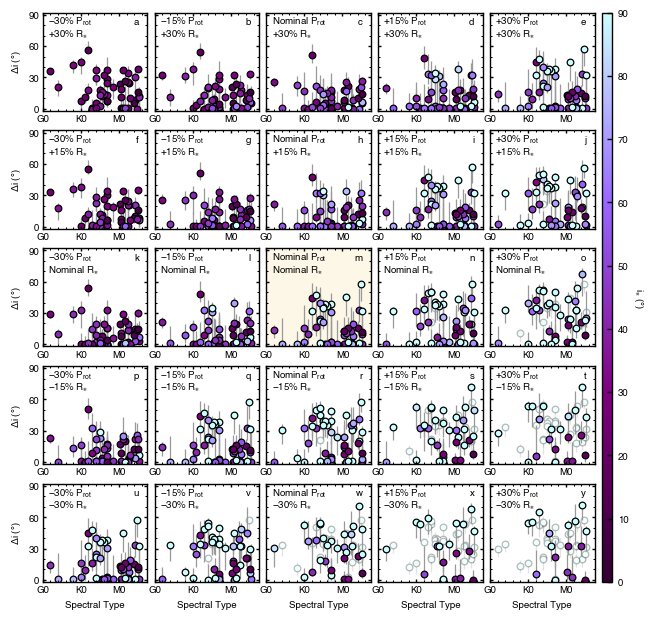

In [62]:
compute_new_posteriors = False
save_csv_file = True

if compute_new_posteriors == False:
    # No need to save new files if plotting data from the current ones
    save_csv_file = False


# Initialize array to keep track of targets where veq and vsini produce non-physical a result
non_physicals = []

# Array of strings for panel labels
letter_strings = ['a', 'b' , 'c' , 'd' , 'e' , 'f' , 'g' , 'h' , 'i' , 'j' , 'k' , 'l' , 'm' , 'n' , 'o' , 'p' , 'q' , 'r' , 's' , 't' , 'u' , 'v' , 'w', 'x', 'y', 'z']

# Initialize letter counter
letter_i = 0
# Initialize axis counter
axnum = 0

# Initialize dictionary to store source data
Figure_2_Source_Data = {}

# Set default font size
font_size = 7

# Set figure size dimensions
figure_width = 11.9 * 0.55
figure_height = 11.25 * 0.55

# Initialize figure and figure axes grid
fig = plt.figure(figsize=(figure_width, figure_height))
gs = gridspec.GridSpec(5, 6, width_ratios=[1, 1, 1, 1, 1, 0.10])
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(5) for jj in range(5)]


for R_shift in R_shifts:
    for P_shift in P_shifts:

        # Set current axis
        ax = axes[axnum]
        ax.minorticks_on()
        # ax.set_rasterized(True)

        # Print which axis to help keep track of things
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('axnum: ', int(axnum+1))
        

        # Initialize temporary list to contain targets where veq and vsini produce non-physical a result
        non_physicals_temporary = []

        # Help keep track of things
        Rshift_text = 'Rshift' + str(R_shift)
        Pshift_text = 'Pshift' + str(P_shift)

        # Define some axes string variables and key strings to make life easy
        x_column = 'SpType'
        xlims = [3.00, 5.75]
        x_filetext = 'SpT'

        y_column = 'disk diff'
        y_column_err_p = 'disk diff +Unc'
        y_column_err_m = 'disk diff -Unc'
        ylims = [-2, 92]
        y_filetext = 'Delta_i'

        z_column = 'i star (deg)'
        z_column_err_p = 'i star -Unc'
        z_column_err_m = 'i star +Unc'
        zlims = [0, 90]
        z_filetext = 'i_Star'

        # String to be used for savefile naming convention
        axes_parameters_text = x_filetext + '-vs-' + y_filetext + '-vs-' + z_filetext
        
        # If creating a new csv file save, move old files out. Otherwise identify the directory containing savefiles corresponding to the current cell
        if save_csv_file == True:
            for file in os.listdir(primordial_disks_sample_directory):
                if ('Primordial_Disks_5x5_TestGrid_' + resolution_text + '_' + axes_parameters_text + '_' + Rshift_text + '_' + Pshift_text in file) and (date_str not in file):
                    os.system('mv ' + primordial_disks_sample_directory + file + ' ' + primordial_disks_sample_directory + 'Old_Versions/' + file)
        else:
            for file in os.listdir(primordial_disks_sample_directory):
                if ('Primordial_Disks_5x5_TestGrid_' + resolution_text + '_' + axes_parameters_text + '_' + Rshift_text + '_' + Pshift_text in file) and (date_str not in file):
                    sample_filepath_stassun = primordial_disks_sample_directory + file

        # Create string with naming convention for savefile corresponding to the current cell
        csv_save_string = 'Primordial_Disks_5x5_TestGrid_' + resolution_text + '_' + axes_parameters_text + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv'


        # If computing new Deltai probability distributions for systematically shifted Prot and R*, perform the reduction and save the new csv file (opt in)
        if compute_new_posteriors == True:
            if R_shift == P_shift:
                condensed_df = pd.read_csv(nominal_condensed_file)
            else:
                condensed_df = compute_Deltai_data_table(df=raw_df, systematic_Rshift=R_shift, systematic_Pshift=P_shift, save_posteriors_dir=distribution_dir, save_date=date_str, targs='all', resolution=sampling_resolution, print_stuff=True, which_radii='stassun')

            if save_csv_file == True:    
                condensed_df.to_csv(primordial_disks_sample_directory + csv_save_string, index=False)
        # Otherwise, read in file containing saved probability distributions
        else:
            condensed_df = pd.read_csv(primordial_disks_sample_directory + csv_save_string)


        # Replace strings with numbers for cases where vsini is an upper limit so things don't break
        condensed_df['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        condensed_df['vsini Unc'] = condensed_df['vsini Unc'].astype(float)
        condensed_df = condensed_df.sort_values('Simbad Name')

        # Create lists of parameter values for easy reading
        targets_list = condensed_df['Simbad Name'].values
        vsinis = np.array(condensed_df['vsini (km/s)'].values)
        vsini_errs = np.array(condensed_df['vsini Unc'].values)
        veqs = np.array(condensed_df['Veq'].values)
        veq_errs = np.array(condensed_df['Veq Unc'].values)
        radii = np.array(condensed_df['Rstar (Rsun)'].values)
        radii_err = np.array(condensed_df['Rstar Unc'].values)

        # Initialize lists to contain alpha values for plotting physically viable or non-viable results
        point_alphas = []
        err_alphas = []
        vlimit_targs = []

        # Identify the targets with veq and vsini that produce non-physical results
        veqs_minus_vsinis = veqs - vsinis
        for vsini_err_i in range(len(targets_list)):

            # Determine 1sig and 2sig uncertainties
            vsini_errs[vsini_err_i] = float(vsini_errs[vsini_err_i])
            veqs_minus_vsinis_err_2sig = 2*np.sqrt(vsini_errs[vsini_err_i]**2 + veq_errs[vsini_err_i]**2)
            
            if (P_shift == 1.0) and (R_shift == 1.0):
                # These cells correspond to nominal results
                point_alphas.append(1.0)
                err_alphas.append(1.0)
            else:
                if veqs_minus_vsinis[vsini_err_i] + veqs_minus_vsinis_err_2sig <= 0:
                    point_alphas.append(0.275)
                    err_alphas.append(0.275)
                else:
                    point_alphas.append(1.0)
                    err_alphas.append(1.0)


        # Create lits of parameter values for easy reading/updating
        targets_list = np.array(condensed_df['Simbad Name'].values)
        parameter_x = np.array(condensed_df[x_column].values)
        parameter_y = np.array(condensed_df[y_column].values)
        parameter_y_err_p = np.array(condensed_df[y_column_err_p].values)
        parameter_y_err_m = np.array(condensed_df[y_column_err_m].values)
        parameter_z = np.array(condensed_df[z_column].values)
        parameter_z_err_p = np.array(condensed_df[z_column_err_p].values)
        parameter_z_err_m = np.array(condensed_df[z_column_err_m].values)
        parameter_y_err = [parameter_y_err_m, parameter_y_err_p]
        parameter_z_err = [parameter_z_err_m, parameter_z_err_p]

        # Save source data to dictionary to save to csv file
        Figure_2_Source_Data[letter_strings[letter_i] + ' SpType'] = parameter_x
        Figure_2_Source_Data[letter_strings[letter_i] + ' Deltai (deg)'] = parameter_y
        Figure_2_Source_Data[letter_strings[letter_i] + ' Deltai +Unc'] = parameter_y_err_p
        Figure_2_Source_Data[letter_strings[letter_i] + ' Deltai -Unc'] = parameter_y_err_m
        Figure_2_Source_Data[letter_strings[letter_i] + ' istar (deg)'] = parameter_z

        # Only display x-axis labels on bottom row
        if axnum >= 20:
            ax.set_xlabel('Spectral Type', fontsize=font_size, weight='light', labelpad=4)
        
        # Only display y-axis labels on leftmost column
        if np.mod(axnum, 5) == 0:
            ax.set_ylabel(r'$\Delta$i ($\degree$)', fontsize=font_size, weight='light', labelpad=4)

        # Normalize the colorbar to match values of z-axis parameters
        map_min = zlims[0]
        map_max = zlims[1]
        parameter_z_norm = plt.Normalize(map_min, map_max)

        # Set point/errorbar sizes and colors
        point_size = 2.7
        point_edgewidth = 0.9
        point_colors = [colormap(parameter_z_norm(bep)) for bep in parameter_z]
        point_edgecolors = ['#000000']*len(point_colors)
        errorbar_linewidth = 0.9


        # Plot points
        for point_i in range(len(targets_list)):

            # Format the target name string so it's recognizable
            target_str = condensed_df['Simbad Name'].values[point_i].replace(' ', '')
            if '/' in condensed_df['Simbad Name'].values[point_i]:
                target_str = target_str.replace('/', '-')
            if '(' in condensed_df['Simbad Name'].values[point_i]:
                target_str = target_str.split('(')[0]

            # Plot non-physical points
            if point_alphas[point_i] != 1.0:
                zord = -6
                non_physicals_temporary.append(target_str) # Keep track of targets with non-physical results
                sc2 = ax.scatter([parameter_x[point_i]], [parameter_y[point_i]], color='#ffffff', edgecolors='None', s=np.pi*point_size**2, linestyle='None', lw=point_edgewidth, alpha=1.0, zorder=zord)
                sc = ax.scatter([parameter_x[point_i]], [parameter_y[point_i]], color=point_colors[point_i], edgecolors=point_edgecolors[point_i], s=np.pi*point_size**2, linestyle='None', lw=point_edgewidth, alpha=point_alphas[point_i], zorder=zord)
                ax.errorbar([parameter_x[point_i]], [parameter_y[point_i]], yerr=[[parameter_y_err[0][point_i]], [parameter_y_err[1][point_i]]],
                    elinewidth=errorbar_linewidth, linewidth=0, capsize=0, ecolor='#999999', capthick=2, alpha=err_alphas[point_i], zorder=zord-2)
            # Plot physically viable points
            else:
                zord = -1
                sc = ax.scatter([parameter_x[point_i]], [parameter_y[point_i]], color=point_colors[point_i], edgecolors=point_edgecolors[point_i], s=np.pi*point_size**2, linestyle='None', lw=point_edgewidth, alpha=point_alphas[point_i], zorder=zord)
                ax.errorbar([parameter_x[point_i]], [parameter_y[point_i]], yerr=[[parameter_y_err[0][point_i]], [parameter_y_err[1][point_i]]],
                    elinewidth=errorbar_linewidth, linewidth=0, capsize=0, ecolor='#999999', capthick=2, alpha=err_alphas[point_i], zorder=zord-2)
            
        
        # Keep track of the targets that resulted in non-physically viable veq and vsini
        non_physicals.append(non_physicals_temporary)

        # Define variables with percent change for printing
        R_percent = -int(np.ceil((1. - R_shift) * 100))
        P_percent = -int(np.ceil((1. - P_shift) * 100))
        R_percent = int(np.round(R_percent / 5) * 5)
        P_percent = int(np.round(P_percent / 5) * 5)

        # Define print strings to display percent change corresponding to current cell
        if R_percent < 0:
            R_text = r'$-$' + str(abs(R_percent)) + '%' + r' R$_{\ast}$'
        if R_percent > 0:
            R_text = '+' + str(abs(R_percent)) + '%' + r' R$_{\ast}$'
        if R_percent == 0:
            R_text = 'Nominal ' + r'R$_{\ast}$'
        if P_percent < 0:
            P_text = r'$-$' + str(abs(P_percent)) + '%' + r' P$_{rot}$'
        if P_percent > 0:
            P_text = '+' + str(abs(P_percent)) + '%' + r' P$_{rot}$'
        if P_percent == 0:
            P_text = 'Nominal ' + r'P$_{rot}$'
        face_text = P_text + '\n' + R_text 


        # Print percent changes and letter labels in cell
        ax.text(0.05, 0.72, face_text, horizontalalignment='left', verticalalignment='bottom', fontsize=font_size, linespacing=1, transform=ax.transAxes)
        ax.text(0.92, 0.86, letter_strings[letter_i], horizontalalignment='right', verticalalignment='bottom', fontsize=font_size, fontweight='bold', transform=ax.transAxes)

        # Set limits for x- and y-axis
        ax.set_xlim(xlims)
        ax.set_ylim(ylims)

        # Convert Sptype number ids to standard nomenclature
        if x_column == 'SpType':
            sptype_designations = {'3': 'G0',
                                   '3.25': 'G2.5',
                                   '3.5': 'G5',
                                   '3.75': 'G7.5',
                                   '4': 'K0',
                                   '4.25': 'K2.5',
                                   '4.5': 'K5',
                                   '4.75': 'K7.5',
                                   '5': 'M0',
                                   '5.25': 'M2.5',
                                   '5.5': 'M5',
                                   '5.75': 'M7.5',
                                   }

            # Because space is limited, make sure xticks are only labeled ticks that correspond to G0, K0, and M0
            xtickvals = ax.get_xticks()
            xticklabs = []
            xticks = []
            for xtick in xtickvals:
                if xtick < xlims[1]:
                    if (np.mod(xtick,1) == 0) and (xtick >= xlims[0]):
                        xticks.append(xtick)
                        xticklabs.append(sptype_designations[str(int(xtick))])
                    elif (np.mod(xtick, 0.5) == 0) and (xtick >= xlims[0]):
                        xticks.append(xtick)
                        xticklabs.append(sptype_designations['{:.1f}'.format(xtick)])
            ax.set_xticks(xticks)
            xticklabels = ax.set_xticklabels(xticklabs, fontsize=font_size)

        # Because space is limited, make sure yticks are labeled in increments of 30 degrees
        if (y_column == 'disk diff') or (y_column == 'i star (deg)') or (y_column == 'i disk (deg)'):
            ytickvals = np.arange(0, 120, 30)
            yticks = [int(ytick) for ytick in ytickvals]
            ax.set_yticks(yticks, which='major')
            
            minor_locator = AutoMinorLocator(3)
            ax.yaxis.set_minor_locator(minor_locator)
            
            if np.mod(axnum, 5) != 0:
                ax.set_yticklabels([])
            else:
                ax.set_yticklabels(yticks, fontsize=font_size)
        else:
            if np.mod(axnum, 5) != 0:
                ax.set_yticklabels([])


        # Set face color for cell showing nominal results
        if (R_shift == 1.0) and (P_shift == 1.0):
                ax.patch.set_facecolor('#fdf7e7')

        # Make sure line thicknesses meet journal standards
        spine_linewidth = 1.0
        minor_linewidth = 0.75
        major_linewidth = 1.0
        minor_linelength = 1.75
        major_linelength = 2.5
        for spine in ax.spines.values():
            spine.set_linewidth(spine_linewidth)
            
        # Set tick properties
        ax.tick_params(which='minor', length=minor_linelength, width=minor_linewidth, pad=2.5, labelsize=font_size)
        ax.tick_params(which='major', length=major_linelength, width=major_linewidth, pad=2.5, labelsize=font_size)

        # if axnum == 23:
        #     ax.text(1.00, -0.75, r'Increasing P$_{rot}$', horizontalalignment='center', verticalalignment='bottom', fontsize=font_size, transform=ax.transAxes)
        
        axnum += 1
        letter_i += 1


# Add colorbar with colormap normalized to given z-parameter space
cbar_ax = fig.add_subplot(gs[:, -1])
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), cax=cbar_ax) # , use_gridspec=True, shrink=1., fraction=0.05, pad=0.02)  # location='top', 
cbar.set_label(r'i$_{\ast}$ ($\degree$)', labelpad=12, rotation=270, fontsize=font_size, weight='light')
cbar_ticks_floats = cbar.get_ticks()
cbar_ticks = [int(cbar_tick) for cbar_tick in cbar_ticks_floats]
cbar.set_ticklabels(cbar_ticks, fontsize=font_size, weight='light')
cbar.ax.tick_params(length=1.5*major_linelength, width=major_linewidth, labelsize=font_size, pad=4)



# Make sure everything's where it should be
fig.subplots_adjust(left=0.06, bottom=0.06, right=0.93, top=0.98, wspace=0.08, hspace=0.20)
# fig.subplots_adjust(left=0.06, bottom=0.20, right=0.93, top=0.98, wspace=0.08, hspace=0.20)


# Save it
nature_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3_Drafts/Figures_and_Tables/'
testgrid_save_string = '5x5_Scatter_Nature_Final.pdf'
fig.savefig(nature_figures_directory + testgrid_save_string, dpi=300)



Figure_2_Source_Data_df = pd.DataFrame(Figure_2_Source_Data)
Figure_2_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Figure_2.csv', index=False)

plt.show()
plt.close()

Reading condensed csv file:  Primordial_Disks_5x5_TestGrid_highRes_SpT-vs-Delta_i-vs-i_Star_Rshift1.3_Pshift0.7_2024-Dec-04.csv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
KDE Bandwidth =  5.3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
axnum:  1
dx:  0.1
Targets with non-physical veq and vsini:  ['2MASSJ04334465+2615005', '2MASSJ04343128+1722201', '2MASSJ04360131+1726120', 'AS209', 'BPTau', 'CITau', 'CIDA-7', 'CXTau', 'DoAr25', 'FPTau', 'FTTau', 'GMAur', 'IMLup', 'IPTau', 'IQTau', 'LkCa15', 'MHO6', 'MYLup', 'PDS111', 'PDS70', 'RXJ1615.3-3255', 'RXJ1842.9-3532', 'RXJ1852.3-3700', 'RYLup', 'SUAur', 'SYCha', 'Sz73', 'Sz90', 'TCha', 'V836Tau', 'WSB52', 'WSB63']

Sample Size: 49

Misaligned Fraction: 22/49
Misaligned objects: ['2MASSJ04360131+1726120', '2MASSJ16083070-3828268', 'CXTau', 'DNTau', 'DoAr25', 'Elias2-24', 'FPTau', 'FTTau', 'GWLup', 'IPTau', 'IQTau', 'MHO6', 'MYLup', 'PDS111', 'PDS70', 'RULup', 'RYLup', 'SUAur', 'Sz114', 'Sz90', 'TCha', 'WSB52']

-----------------------

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


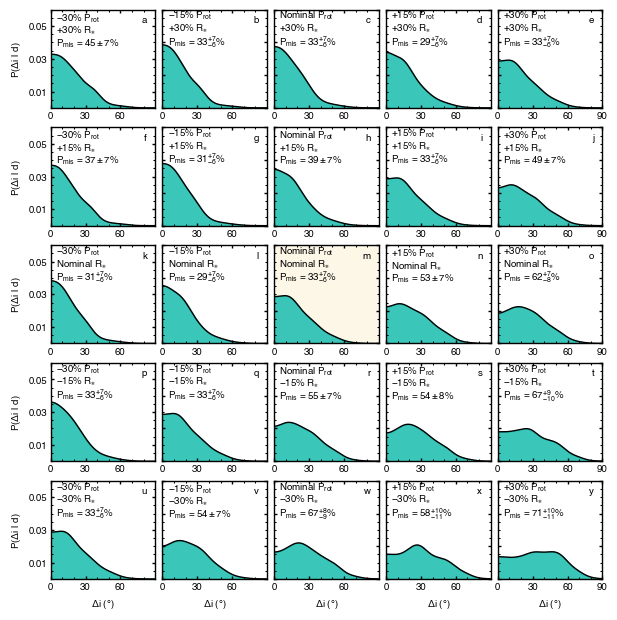

In [65]:
# Initialize dictionary to store source data
Figure_3_Source_Data = {}

# Set figure size dimensions
figure_width = 11.9 * 0.55
figure_height = 11.25 * 0.55

# Same 
axnum = 0
letter_i = 0

fig = plt.figure(figsize=(figure_width, figure_height))
gs = gridspec.GridSpec(5, 6, width_ratios=[1, 1, 1, 1, 1, 0.10])
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(5) for jj in range(5)]

for R_shift in R_shifts:
    for P_shift in P_shifts:

        ax = axes[axnum]
        ax.minorticks_on()

        Rshift_text = 'Rshift' + str(R_shift)
        Pshift_text = 'Pshift' + str(P_shift)

        csv_save_string = 'Primordial_Disks_5x5_TestGrid_' + resolution_text + '_' + axes_parameters_text + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv'

        print('Reading condensed csv file: ', csv_save_string)

        condensed_df = pd.read_csv(primordial_disks_sample_directory + csv_save_string)

        if axnum >= 20:
            ax.set_xlabel(r'$\Delta$i ($\degree$)', fontsize=font_size, weight='light', labelpad=4)
        if np.mod(axnum, 5) == 0:
            ax.set_ylabel(r'P($\Delta$i | d)', fontsize=font_size, weight='light', labelpad=4)

        
        # -------------------------------- COMPUTE AND PLOT KDE -------------------------------- # 

        # Set KDe bandwidth and number of random draws from probability distributions
        band_width = 5.3
        number_of_draws = int(1e3)

        if axnum == 0:
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print('KDE Bandwidth = ', band_width)
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('axnum: ', int(axnum+1))

        # Initiate list to contain objects with physically viable veq and vsini measurements
        physicals = []

        # Don't need to recompute this along the diagonal (Prot and Rstar are scaled equally). Results are = nominal.
        if axnum + 1 in nominal_axnums:
            nominal_df = pd.read_csv(nominal_kde_file)

            density_estimation = nominal_df['density_estimation'].values
            all_posterior_i_values = nominal_df['all_posterior_i_values'].values
            posterior_i_values = all_posterior_i_values[all_posterior_i_values >= 0]

            # Mirror the KDE about 0
            density_estimation_mirrored = density_estimation[::-1]

            # Add mirrored KDE
            density_estimation_total = density_estimation + density_estimation_mirrored
            
            density_estimation_total_positive_x = density_estimation_total[(all_posterior_i_values >= 0) & (all_posterior_i_values <= 90)]

        # Compute KDE for current combination of Prot and Rstar scaling factors
        else:
            test_grid_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/TestGrid/High/'

            Posteriors = pd.read_csv(test_grid_dir + 'Posteriors_5x5_CXTau_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv')
            posterior_i_values = Posteriors['i (deg)'].values
            x_grid = np.array(posterior_i_values).reshape(-1, 1)

            reverse_posterior_i_values = -posterior_i_values[::-1][:-1]
            all_posterior_i_values = np.concatenate((np.array(reverse_posterior_i_values), np.array(posterior_i_values)))
            x_grid_all = np.array(all_posterior_i_values).reshape(-1, 1)


            data_for_kde = []
            for targetnum in range(len(condensed_df['Simbad Name'].values)):

                target_str = condensed_df['Simbad Name'].values[targetnum].replace(' ', '')
                if '/' in condensed_df['Simbad Name'].values[targetnum]:
                    target_str = target_str.replace('/', '-')
                if '(' in condensed_df['Simbad Name'].values[targetnum]:
                    target_str = target_str.split('(')[0]

                if target_str not in non_physicals[axnum]:
                    physicals.append(target_str)
                    
                    Posteriors = pd.read_csv(test_grid_dir + 'Posteriors_5x5_' + target_str + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv')
                    P_Delta_i_target = np.array(Posteriors['P(Delta i | d)'].values)
                    data_for_kde.extend(choices(posterior_i_values, P_Delta_i_target, k=number_of_draws))

            data_for_kde = np.array(data_for_kde).reshape(-1, 1)

            kde = KernelDensity(kernel='gaussian', bandwidth=band_width).fit(data_for_kde)
            log_density = kde.score_samples(x_grid_all)
            density_estimation = np.array(np.exp(log_density))

            density_estimation_mirrored = density_estimation[::-1]
            density_estimation_total = density_estimation + density_estimation_mirrored
            density_estimation_total_positive_x = density_estimation_total[(all_posterior_i_values >= 0) & (all_posterior_i_values <= 90)]

        # Keep parameter space between 0–90 deg
        x_grid_plot = all_posterior_i_values[(all_posterior_i_values >= 0) & (all_posterior_i_values <= 90)]
        dx = np.diff(x_grid_plot)[0]

        density_estimation_total_positive_x = density_estimation_total_positive_x / (sum(density_estimation_total_positive_x) * dx)

        kde_line_color = '#2db996'
        kde_fill_color = '#26c0b3'
        kde_linewidth = 1

        ax.plot(x_grid_plot, density_estimation_total_positive_x, color='#000000', lw=kde_linewidth, zorder=-1)
        ax.fill_between(x_grid_plot, density_estimation_total_positive_x, color=kde_fill_color, alpha=0.9, zorder=-2)

        # Save source data to dictionary to save to csv file
        Figure_3_Source_Data[letter_strings[letter_i] + ' Deltai (deg)'] = x_grid_plot
        Figure_3_Source_Data[letter_strings[letter_i] + ' KDE'] = density_estimation_total_positive_x

        # Compute the misalignment rate for the results from this combination of Prot and Rstar
        misalignment_probability, misalignment_probability_sig1_m, misalignment_probability_sig1_p, misalignment_probability_sig2_m, misalignment_probability_sig2_p, misalignment_prob_dist = misalignment_rate(test_df=condensed_df, physicals=physicals)

        # Prepare misalignment rate text to print
        if P_shift == R_shift:
            # We already know the nominal misalignment rate
            MisProb_text = r'P$_{mis}$ = 33$^{+7}_{-6}$%'
        else:
            p_unc = int(np.round(misalignment_probability_sig1_p*100))
            m_unc = int(np.round(misalignment_probability_sig1_m*100))
            if p_unc != m_unc:
                MisProb_text = r'P$_{mis}$' + r' = ${:d}^{{+{:d}}}_{{-{:d}}}$%'.format(int(np.round(misalignment_probability*100)), p_unc, m_unc)
            else:
                MisProb_text = r'P$_{mis}$' + r' = ${:d}\pm{:d}$%'.format(int(np.round(misalignment_probability*100)), p_unc)

        # ------------------- INSERT GRID CELL FACE TEXT ------------------- # 
        R_percent = -int(np.ceil((1 - R_shift) * 100))
        P_percent = -int(np.ceil((1 - P_shift) * 100))
        R_percent = int(np.round(R_percent / 5) * 5)
        P_percent = int(np.round(P_percent / 5) * 5)

        # Define print strings to display percent change corresponding to current cell
        if R_percent < 0:
            R_text = r'$-$' + str(abs(R_percent)) + '%' + r' R$_{\ast}$'
        if R_percent > 0:
            R_text = '+' + str(abs(R_percent)) + '%' + r' R$_{\ast}$'
        if R_percent == 0:
            R_text = 'Nominal ' + r'R$_{\ast}$'
        if P_percent < 0:
            P_text = r'$-$' + str(abs(P_percent)) + '%' + r' P$_{rot}$'
        if P_percent > 0:
            P_text = '+' + str(abs(P_percent)) + '%' + r' P$_{rot}$'
        if P_percent == 0:
            P_text = 'Nominal ' + r'P$_{rot}$'
        face_text = P_text + '\n' + R_text + '\n' + MisProb_text

        # Print percent changes and letter labels in cell
        if r'\pm' in face_text:
            text_x, text_y = 0.05, 0.60
        else:
            text_x, text_y = 0.05, 0.59
        ax.text(text_x, text_y, face_text, horizontalalignment='left', verticalalignment='bottom', fontsize=font_size, linespacing=1, transform=ax.transAxes)
        ax.text(0.92, 0.85, letter_strings[letter_i], horizontalalignment='right', verticalalignment='bottom', fontsize=font_size, fontweight='bold', transform=ax.transAxes)

        xmin, xmax = 0, 90
        ymin, ymax = 0, 0.06
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)

        # Specifying tick labels and ranges
        if np.mod(axnum, 5) != 0:
            ax.set_yticklabels([])
        else:
            ytickvals = [0.01, 0.03, 0.05]
            ax.set_yticks(ytickvals)
            ax.set_yticklabels(ytickvals, fontsize=font_size)

        if np.mod(axnum + 1, 5) == 0:
            xtickvals = np.arange(0, 90 + 30, 30)
        else:
            xtickvals = np.arange(0, 90, 30)
        xticks = [int(xtick) for xtick in xtickvals]
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks, fontsize=font_size)
        
        minor_locator = AutoMinorLocator(3)
        ax.xaxis.set_minor_locator(minor_locator)

        # Set face color for cell showing nominal results
        if (R_shift == 1.0) and (P_shift == 1.0):
                ax.patch.set_facecolor('#fdf7e7')

        # Make sure line thicknesses meet journal standards
        spine_linewidth = 1.0
        minor_linewidth = 0.75
        major_linewidth = 1.0
        minor_linelength = 1.75
        major_linelength = 2.5
        for spine in ax.spines.values():
            spine.set_linewidth(spine_linewidth)
            
        # Set tick properties
        ax.tick_params(which='minor', length=minor_linelength, width=minor_linewidth, pad=2.5, labelsize=font_size)
        ax.tick_params(which='major', length=major_linelength, width=major_linewidth, pad=2.5, labelsize=font_size)
        
        axnum += 1
        letter_i += 1


fig.subplots_adjust(left=0.11, bottom=0.06, right=0.98, top=0.98, wspace=0.08, hspace=0.20)
# fig.subplots_adjust(left=0.06, bottom=0.06, right=0.93, top=0.98, wspace=0.08, hspace=0.20)

# Save it
nature_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3_Drafts/Figures_and_Tables/'
testgrid_save_string = '5x5_KDE_Nature_Final.pdf'
fig.savefig(nature_figures_directory + testgrid_save_string, dpi=300)

Figure_3_Source_Data_df = pd.DataFrame(Figure_3_Source_Data)
Figure_3_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Figure_3.csv', index=False)

plt.show()
plt.close()